In [71]:
import numpy as np
import matplotlib.pyplot as plt
import statistics 

# Pseudorandom Number Generation

In [2]:
def GeneratorOfPseudorandomNumber(X0 , a , c, m, n):
    psudo_random_number = []
    for i in range(n):
        X0 = (a*X0 + c) % m
        X = X0/m
        psudo_random_number.append(X)
    return psudo_random_number

In [12]:
X0 = 5
a = 7
c = 0
m = 2**10 - 1
n = 2**10 - 2

GeneratorOfPseudorandomNumber(X0,a,c,m,n)

[0.03421309872922776,
 0.23949169110459434,
 0.6764418377321603,
 0.7350928641251222,
 0.14565004887585534,
 0.019550342130987292,
 0.13685239491691104,
 0.9579667644183774,
 0.7057673509286413,
 0.9403714565004888,
 0.5826001955034213,
 0.07820136852394917,
 0.5474095796676441,
 0.8318670576735093,
 0.823069403714565,
 0.761485826001955,
 0.3304007820136852,
 0.3128054740957967,
 0.18963831867057673,
 0.32746823069403713,
 0.29227761485826004,
 0.04594330400782014,
 0.32160312805474095,
 0.2512218963831867,
 0.7585532746823069,
 0.3098729227761486,
 0.16911045943304007,
 0.18377321603128055,
 0.28641251221896386,
 0.004887585532746823,
 0.03421309872922776,
 0.23949169110459434,
 0.6764418377321603,
 0.7350928641251222,
 0.14565004887585534,
 0.019550342130987292,
 0.13685239491691104,
 0.9579667644183774,
 0.7057673509286413,
 0.9403714565004888,
 0.5826001955034213,
 0.07820136852394917,
 0.5474095796676441,
 0.8318670576735093,
 0.823069403714565,
 0.761485826001955,
 0.33040078201

# Bernoulli Distribution

$x\sim \text{bern}(p)$ where p is 0.5.

In [81]:
N = 100000
U = np.random.uniform(size=N)
p = 0.5


def Ber(U, p):
    bern_p = []
    for u in U:
        if u <= p:
            bern_p.append(1)
        else:
            bern_p.append(0)
    return bern_p

bern_p = Ber(U, p)
ber_expection = sum(bern_p) / N

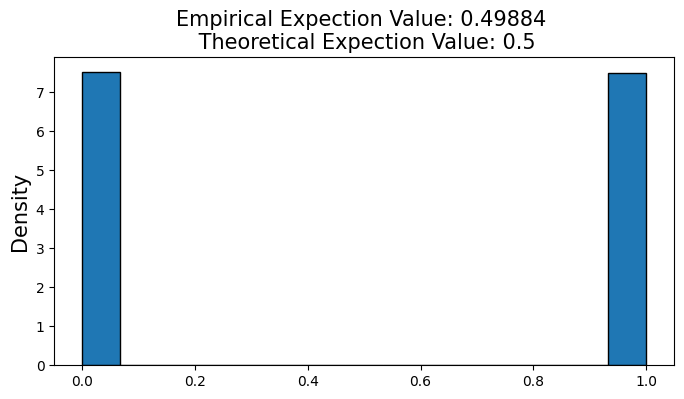

In [82]:
plt.figure(figsize=(8, 4))
plt.hist(bern_p ,edgecolor="black",density=True, bins=15)
plt.title(f"Empirical Expection Value: {ber_expection} \n Theoretical Expection Value: {p}",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

# Binomial distribution

$x\sim \text{bin}(n,p)$ where $n = 5$ and $ p = 0.6$

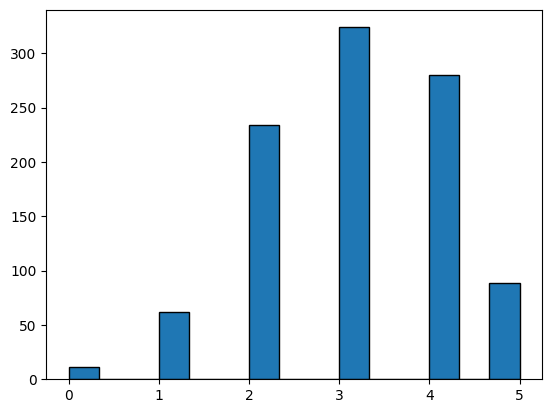

In [74]:
# numpy

Bin_np = np.random.binomial(n=5, p=0.6, size=1000)
plt.hist(Bin_np, edgecolor="black", bins=15)
plt.show()

let $x_i\sim \text{bern}(p)$, 
then $$\sum_{i=1}^{5}x_i\sim \text{bin}(n,p)$$

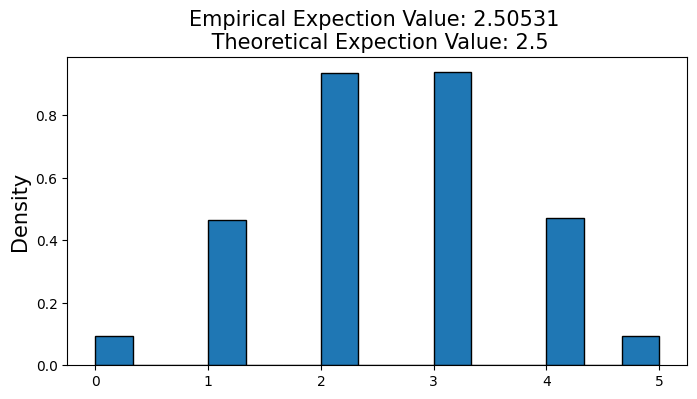

In [83]:
# manualy

N = 100000
P = 0.5
n = 5


def binomial(n, P):
    U = np.random.uniform(size=n)
    bernoulli = []
    for u in U:
        if u <= P:
            bernoulli.append(1)
        else:
            bernoulli.append(0)
    return sum(bernoulli)


Bin_man = []
for _ in range(N):
    Bin_man.append(binomial(n, P))

bin_expection = sum(Bin_man)/N

plt.figure(figsize=(8, 4))
plt.hist(Bin_man, edgecolor="black",density=True, bins=15)
plt.title(f"Empirical Expection Value: {bin_expection} \n Theoretical Expection Value: {n*p}",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()